In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the training data
train_data = pd.read_csv("train_data.csv")

# Display basic information
print("Training Data Summary:")
print(train_data.info())
print("\nFirst few rows of the training data:")
print(train_data.head())

Training Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512041 entries, 0 to 512040
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TIMESTAMP              512041 non-null  object 
 1   LAST_PRICE_HHI         512041 non-null  float64
 2   TURNOVER_VOLUME_HHI    512041 non-null  float64
 3   LAST_BID_PRICE_0_HHI   512041 non-null  float64
 4   LAST_ASK_PRICE_0_HHI   512041 non-null  float64
 5   LAST_BID_VOLUME_0_HHI  512041 non-null  float64
 6   LAST_ASK_VOLUME_0_HHI  512041 non-null  float64
 7   LAST_PRICE_HSI         512041 non-null  float64
 8   TURNOVER_VOLUME_HSI    512041 non-null  float64
 9   LAST_BID_PRICE_0_HSI   512041 non-null  float64
 10  LAST_ASK_PRICE_0_HSI   512041 non-null  float64
 11  LAST_BID_VOLUME_0_HSI  512041 non-null  float64
 12  LAST_ASK_VOLUME_0_HSI  512041 non-null  float64
 13  MIDPOINT_HHI           512041 non-null  float64
 14  MIDPOINT_HSI 

In [3]:
# Convert TIMESTAMP to datetime
train_data['TIMESTAMP'] = pd.to_datetime(train_data['TIMESTAMP'])
print("TIMESTAMP converted to datetime.")

# Descriptive statistics for numeric columns
print("\nSummary Statistics:")
print(train_data.describe())


TIMESTAMP converted to datetime.

Summary Statistics:
       LAST_PRICE_HHI  TURNOVER_VOLUME_HHI  LAST_BID_PRICE_0_HHI  \
count   512041.000000        512041.000000         512041.000000   
mean      8353.637775           109.326478           8352.916360   
std       1782.271845           178.479892           1782.248375   
min       4931.000000             1.000000           4931.000000   
25%       6872.000000            15.000000           6871.000000   
50%       8121.000000            52.000000           8120.000000   
75%       9496.000000           139.000000           9495.000000   
max      12252.000000         15483.000000          12251.000000   

       LAST_ASK_PRICE_0_HHI  LAST_BID_VOLUME_0_HHI  LAST_ASK_VOLUME_0_HHI  \
count         512041.000000          512041.000000          512041.000000   
mean            8354.356180              10.036075               9.794530   
std             1782.288484              25.174862               8.810228   
min             4932.0000

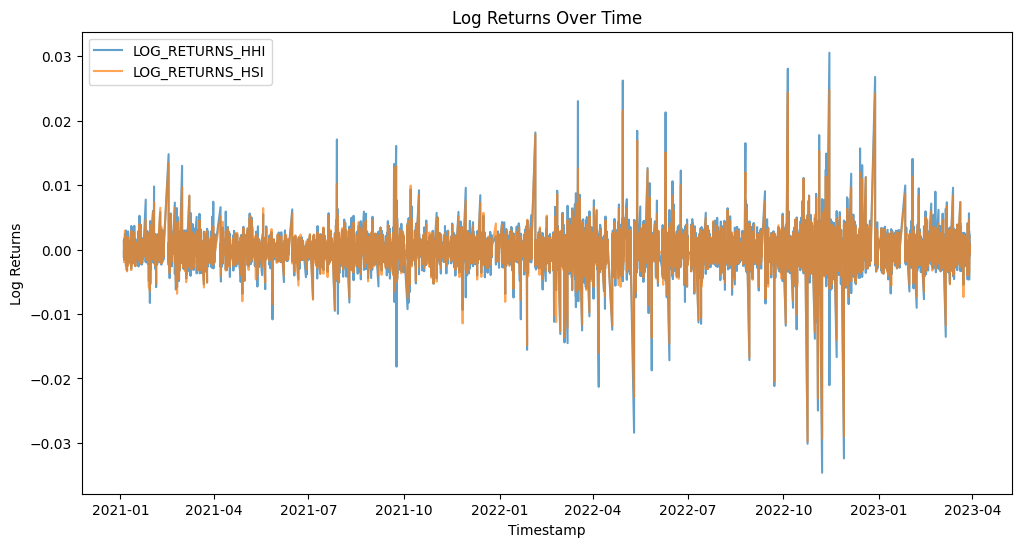

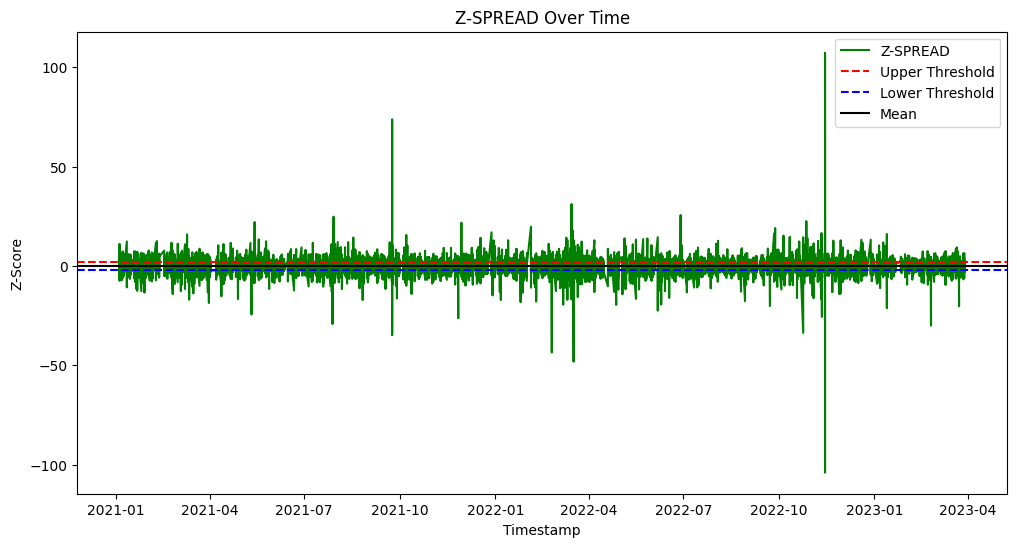

In [5]:
# Plot LOG_RETURNS_HHI and LOG_RETURNS_HSI over time
plt.figure(figsize=(12, 6))
plt.plot(train_data['TIMESTAMP'], train_data['LOG_RETURNS_HHI'], label='LOG_RETURNS_HHI', alpha=0.7)
plt.plot(train_data['TIMESTAMP'], train_data['LOG_RETURNS_HSI'], label='LOG_RETURNS_HSI', alpha=0.7)
plt.title('Log Returns Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

# Plot Z-SPREAD over time
plt.figure(figsize=(12, 6))
plt.plot(train_data['TIMESTAMP'], train_data['Z_SPREAD'], label='Z-SPREAD', color='green')
plt.axhline(2, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(-2, color='blue', linestyle='--', label='Lower Threshold')
plt.axhline(0, color='black', linestyle='-', label='Mean')
plt.title('Z-SPREAD Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Z-Score')
plt.legend()
plt.show()


In [ ]:
!pip install sklearn
from scikit_learn.ensemble import IsolationForest

# Select relevant features for anomaly detection
features = train_data[['Z_SPREAD', 'TURNOVER_VOLUME_HHI', 'TURNOVER_VOLUME_HSI']].copy()

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
train_data['ANOMALY_SCORE'] = iso_forest.fit_predict(features)

# Filter anomalies (ANOMALY_SCORE = -1 indicates anomaly)
ml_anomalies = train_data[train_data['ANOMALY_SCORE'] == -1]

# Display the number of anomalies detected and sample anomaly data
num_anomalies = len(ml_anomalies)
sample_anomalies = ml_anomalies[['TIMESTAMP', 'Z_SPREAD', 'TURNOVER_VOLUME_HHI', 'TURNOVER_VOLUME_HSI']].head()

num_anomalies, sample_anomalies


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
    

ModuleNotFoundError: No module named 'sklearn'